### Importing all libraries I need

In [497]:
import pandas as pd 
import numpy as np
# import tweepy
import requests
import re
import json
import matplotlib.pyplot as plt
import datetime
import os
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 1. Gathering

### downloading the raw data files.

In [498]:
# reading Image Predictions File and extracting Image-predictions.tsv

folder_name = 'image_predictions_file'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)


with open(os.path.join(folder_name,
                      url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [499]:
# reading (tweet-json.txt) file line by line 

df_list = []

with open('tweet-json.txt' ,'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        
        # Append to list of dictionaries.
        
        df_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': fav_count,
                        'user_count': user_count})

## Reading files.

In [500]:
# reading Enhanced Twitter Archive (.csv) and creating pandas dataframe.
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

# reading Image-predictions (.tsv) and creating pandas dataframe.
image_predictions_df = pd.read_csv('image_predictions_file/image-predictions.tsv', sep='\t')

# # JSON objects to DataFrame:
api_df = pd.DataFrame(df_list , columns = ['tweet_id', 'retweet_count', 'favorite_count','user_count'])

# 2. Assessing

In [501]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


- there is an invalid name like (a)
- 'None' instead of NaN in missing values.

In [502]:
image_predictions_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1002,708810915978854401,https://pbs.twimg.com/media/CdYzwuYUIAAHPkB.jpg,2,golden_retriever,0.976139,True,Labrador_retriever,0.016301,True,Norfolk_terrier,0.001871,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1044,712717840512598017,https://pbs.twimg.com/media/CeQVF1eVIAAJaTv.jpg,1,Great_Pyrenees,0.732043,True,kuvasz,0.121375,True,Irish_wolfhound,0.049524,True
1174,737322739594330112,https://pbs.twimg.com/media/Cjt_Hm6WsAAjkPG.jpg,1,guinea_pig,0.148526,False,solar_dish,0.097183,False,park_bench,0.059312,False
1645,808134635716833280,https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg,1,cocker_spaniel,0.740220,True,Dandie_Dinmont,0.061604,True,English_setter,0.041331,True


In [503]:
api_df.sample(5)

,tweet_id,retweet_count,favorite_count,user_count
2328,666362758909284353,595,804,3201018
727,782021823840026624,7236,0,3200901
511,811744202451197953,1884,8429,3200895
933,753398408988139520,2186,6384,3200943
412,822872901745569793,48265,132810,3200894


In [504]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- wrong data type for alot of columns

In [505]:
archive_df.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [506]:
archive_df['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

- this column is not a variable.

In [507]:
archive_df['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [508]:
archive_df['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

- unexpected values due to faults in reading decimal values.
- this column is treated as an integer.

In [509]:
archive_df['tweet_id'].duplicated().sum()

0

In [510]:
image_predictions_df['tweet_id'].duplicated().sum()

0

In [511]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- column headers are not descriptive .
- tweet_id column should be treated as string because of it is categorical data.

In [512]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
 3   user_count      2354 non-null   int64
dtypes: int64(4)
memory usage: 73.7 KB


- tweet_id column should be treated as string because of it is categorical data.

# Assessment summary.

## Quality issues:
##### In `archive_df`:
- `NaN` is mistakenly written as **None** in: `doggo`,`floofer`,`pupper`,`puppo`, and `name`.
- `tweet_id` type is **integer** instead of **str**.
- `in_reply_to_status_id` type is **float** instead of **str**.
- `in_reply_to_user_id` type is **float** instead of **str**.
- `timestamp` type is **str** instead of **DateTime**.
- `source` type is **str** instead of **category**.
- `retweeted_status_id` type is **float** instead of **str**.
- `retweeted_status_user_id` type is **float** instead of **str**.
- `retweeted_status_timestamp` type is **str** instead of **DateTime**.
- `name` invalid names.
- `rating_numerator` Ratings with decimal values incorrectly extracted
- `rating_numerator` dtype is **int** instead of **float**.

##### In `image_predictions_df`:
- `tweet_id` type is **integer** instead of **str**.
-  columns headers are values not variable and not descriptive.

##### In`api_df`:
- `tweet_id` type is **integer** instead of **str**

## Tidiness Issues:
##### In `archive_df`:
- `doggo`,`floofer`,`pupper`, and `puppo` should all be one column called e.g.`dog_stage`.
- Some records are irrelevant (i.e. retweets or have replies).
- some recordes in `archive_df` don't have images in `image_predictions_df` so i should filter the 3 datasets according to the records in `image_predictions_df` to get the original tweets with images. 
- Data from the 3 datasets (`archive_df`, `image_predictions_df`, and `api_df`) can be combined in one DataFrame for simplicity.


## 3. Cleaning
### First, we need to take a copies for our datasets

In [513]:
tweet_clean = archive_df.copy()
image_clean = image_predictions_df.copy()
api_clean = api_df.copy()

### Define
##### In `archive_df:
- Some records are irrelevant (i.e. retweets or have replies).
- some recordes in `archive_df` don't have images in `image_predictions_df` so i should filter the 3 datasets according to the records in `image_predictions_df` to get the original tweets with images.



### Solution
- Drop every row that is `retweeted_status_id.notnull()`& `in_reply_to_status_id.notnull()`
- use the `image_predictions_df` to drop all irrelevant records from the other 2 datasets.
- through creating a list of tweet_ids with images "tweets_with_image" and confirming itslength &use to get rid of tweets without images.


### code

In [514]:
# First :

# Filter all rows for which the 'in_reply_to_status_id' and 'retweeted_status_id' is not null 
# because the rest of the columns are directly dependent on those two columns. 
retweet_entries = tweet_clean.retweeted_status_id.notnull()
in_reply_enteries = tweet_clean.in_reply_to_status_id.notnull()

# Check the number of rows of retweets before dropping.
# tweet_clean[retweet_entries].shape[0] , tweet_clean[in_reply_enteries].shape[0]

# Dropping the retweets & replies.
tweet_clean = tweet_clean[~retweet_entries]
tweet_clean = tweet_clean[~in_reply_enteries]


#check:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [515]:
# Second :

# creating a list of tweet_ids with images "tweets_with_image" from image_clean df and confirming its length
tweets_with_image = list(image_clean.tweet_id.unique())

# Cleaning in action ;)
tweet_clean = tweet_clean[tweet_clean.tweet_id.isin(tweets_with_image)]



In [516]:
# creating a list of tweet_ids that unique "unique_tweets" from tweet_clean df and confirming its length
unique_tweets = list(tweet_clean.tweet_id.unique())

# Cleaning in action ;)
image_clean = image_clean[image_clean.tweet_id.isin(unique_tweets)]



In [517]:
# agian, creating a list of tweet_ids that unique "unique_tweets" from tweet_clean df and confirming its length
unique_tweets = list(tweet_clean.tweet_id.unique())

# Cleaning in action ;)
api_clean = api_clean[api_clean.tweet_id.isin(unique_tweets)]



### test

In [518]:
tweet_clean.shape , image_clean.shape , api_clean.shape

((1971, 17), (1971, 12), (1971, 4))

## Define:
##### In `archive_df:

- invalid names in name column.
- wrong representation for missing values as 'None'.
## solution:
- try extracting the right name from the text otherwise assign NaN to this value.
- use . replace() to convret them to NaNs.

## Code

In [522]:
# first,get all wrong names which have only lowercase characters.

wrong_names = list(tweet_clean[tweet_clean.name.str.islower()].name.unique())
wrong_names

['such',
 'a',
 'quite',
 'one',
 'incredibly',
 'very',
 'my',
 'not',
 'his',
 'an',
 'just',
 'getting',
 'this',
 'unacceptable',
 'all',
 'infuriating',
 'the',
 'actually',
 'by',
 'officially',
 'light',
 'space']

In [524]:
wrong_names = list(tweet_clean[tweet_clean.name.str.islower()].name)
len(wrong_names)

98

In [525]:
tweet_clean.name[tweet_clean.name == 'an']

1025    an
1362    an
2204    an
2333    an
2335    an
2349    an
Name: name, dtype: object

In [526]:
# check
tweet_clean.name.value_counts(dropna = False)

None        524
a            55
Charlie      11
Oliver       10
Lucy         10
           ... 
Ed            1
Superpup      1
Remy          1
Ester         1
Marq          1
Name: name, Length: 935, dtype: int64

In [527]:
pattern = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in tweet_clean.iterrows():
    if row['name'] in wrong_names:
        try:
            Correct_name=re.findall(pattern,row['text'])[0]
            tweet_clean.loc[index,'name'] = tweet_clean.loc[index,'name'].replace(row['name'], Correct_name)
            
        except:
            tweet_clean.loc[index,'name'] = np.nan

In [528]:
# check
tweet_clean.name.value_counts(dropna = False)

None       524
NaN         76
Charlie     11
Oliver      10
Lucy        10
          ... 
Donny        1
Apollo       1
Johm         1
Darrel       1
Chelsea      1
Name: name, Length: 932, dtype: int64

In [529]:
tweet_clean.name=tweet_clean.name.replace('None',np.nan)

In [530]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1971 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1971 non-null   object 
 4   source                      1971 non-null   object 
 5   text                        1971 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1971 non-null   object 
 10  rating_numerator            1971 non-null   int64  
 11  rating_denominator          1971 non-null   int64  
 12  name                        1371 non-null   object 
 13  doggo                       1971 

## Test

In [531]:
tweet_clean.name.value_counts(dropna = False)

NaN        600
Charlie     11
Oliver      10
Cooper      10
Lucy        10
          ... 
Ralphie      1
Pawnd        1
Harry        1
Goliath      1
Shelby       1
Name: name, Length: 931, dtype: int64

# Define: 
##### In `archive_df`:
- Ratings with decimal values incorrectly extracted in `rating_numerator` column
- `rating_numerator` dtype is int instead of float.

## solution:
- extract the right decimal value using `str.extract( )`.
- convert `rating_numerator` to float using `astype()`.

## code 

In [532]:
# extract 
ratings = tweet_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

# modify 
tweet_clean.rating_numerator = ratings

# convert
tweet_clean['rating_numerator'] = tweet_clean['rating_numerator'].astype(float)


## test

In [533]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1971 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1971 non-null   object 
 4   source                      1971 non-null   object 
 5   text                        1971 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1971 non-null   object 
 10  rating_numerator            1971 non-null   float64
 11  rating_denominator          1971 non-null   int64  
 12  name                        1371 non-null   object 
 13  doggo                       1971 

In [534]:
tweet_clean['rating_numerator'].unique()

array([1.300e+01, 1.200e+01, 1.400e+01, 1.350e+01, 1.100e+01, 6.000e+00,
       1.000e+01, 0.000e+00, 8.400e+01, 2.400e+01, 9.750e+00, 5.000e+00,
       1.127e+01, 3.000e+00, 7.000e+00, 8.000e+00, 9.000e+00, 4.000e+00,
       1.650e+02, 1.776e+03, 2.040e+02, 5.000e+01, 9.900e+01, 8.000e+01,
       4.500e+01, 6.000e+01, 4.400e+01, 1.210e+02, 1.126e+01, 2.000e+00,
       1.440e+02, 8.800e+01, 1.000e+00, 4.200e+02])

## Define
##### In `archive_df`:
- `NaN` is mistakenly written as **None** in: `doggo`,`floofer`,`pupper`, and `puppo`.
- doggo,floofer,pupper, and puppo should all be one column called e.g.dog_stage.
## Solution
- merge the last 4 columns to create new column called `dog_stage` (further investegation needed)

## code

In [535]:
# 1. Check for the over all number of pets under each category
(tweet_clean.loc[:, 'doggo':"puppo"] != 'None') .sum()

doggo       73
floofer      8
pupper     209
puppo       23
dtype: int64

In [536]:
# 2. Check if the classification correct and mutually exclusive:

# Getting all the tweets where the value of both 'doggo' and 'pupper' is not none
nonunique_stage = tweet_clean[(tweet_clean['doggo'] != 'None') & (tweet_clean['pupper'] != 'None')]

# Extracting only those the columns of interest and investigate its head
nonunique_stage.iloc[:, -4:].head()

,doggo,floofer,pupper,puppo
460,doggo,None,pupper,None
531,doggo,None,pupper,None
575,doggo,None,pupper,None
705,doggo,None,pupper,None
889,doggo,None,pupper,None


In [537]:
# first :
# I should fix the “None” string issue in the those entries by replacing it with empty string "". That’s a quality issue.

tweet_clean["doggo"] = tweet_clean["doggo"].replace("None", "")
tweet_clean["floofer"] = tweet_clean["floofer"].replace("None", "")
tweet_clean["pupper"] = tweet_clean["pupper"].replace("None", "")
tweet_clean["puppo"] = tweet_clean["puppo"].replace("None", "")

In [538]:
# Second :
# creating the new line by summing.

tweet_clean['dog_stage'] = tweet_clean['doggo'] + tweet_clean['floofer'] + tweet_clean['pupper'] + tweet_clean['puppo']

# then, Drop (doggo,floofer,pupper,puppo) columns because they are no longer needed

tweet_clean=tweet_clean.drop("doggo", axis=1)
tweet_clean=tweet_clean.drop("floofer", axis=1)
tweet_clean=tweet_clean.drop("pupper", axis=1)
tweet_clean=tweet_clean.drop("puppo", axis=1)

# Next, Make any record that still like this "" as NaN. 

tweet_clean.dog_stage.replace( "",np.NaN, inplace = True)

In [539]:
# Third :
# solving the problem of having two values 

tweet_clean.dog_stage = tweet_clean.dog_stage.replace('doggopupper', 'doggo-pupper')
tweet_clean.dog_stage = tweet_clean.dog_stage.replace('doggopuppo', 'doggo-puppo')
tweet_clean.dog_stage = tweet_clean.dog_stage.replace('doggofloofer', 'doggo-floofer')

## Test 

In [540]:
tweet_clean.dog_stage.value_counts(dropna=False)

NaN              1668
pupper            201
doggo              63
puppo              22
doggo-pupper        8
floofer             7
doggo-floofer       1
doggo-puppo         1
Name: dog_stage, dtype: int64

### Define :
##### In `archive_df`:
- `tweet_id` type is **integer** instead of **str**.
- `in_reply_to_status_id` type is **float** instead of **str**.
- `in_reply_to_user_id` type is **float** instead of **str**.
- `timestamp` type is **str** instead of **DateTime**.
- `source` type is **str** instead of **category**.
- `retweeted_status_id` type is **float** instead of **str**.
- `retweeted_status_user_id` type is **float** instead of **str**.
- `retweeted_status_timestamp` type is **str** instead of **DateTime**.


##### In `image_predictions_df`:
- `tweet_id` type is **integer** instead of **str**.

##### In `api_df`:
- `tweet_id` type is **integer** instead of **str**

#### Solution:
- Change values to `str` using `.astype()` method.
- Change values to `category` using `.astype()` method.
- Change values to `datetime` using `pd.to_datetime()` method.

## code 

In [541]:
tweet_clean['tweet_id'] = tweet_clean['tweet_id'].astype(str)
tweet_clean['in_reply_to_status_id'] = tweet_clean['in_reply_to_status_id'].astype(str)
tweet_clean['in_reply_to_user_id'] = tweet_clean['in_reply_to_user_id'].astype(str)
tweet_clean['retweeted_status_id'] = tweet_clean['retweeted_status_id'].astype(str)
tweet_clean['retweeted_status_user_id'] = tweet_clean['retweeted_status_user_id'].astype(str)
image_clean['tweet_id'] = image_clean['tweet_id'].astype(str)
api_clean['tweet_id'] = api_clean['tweet_id'].astype(str)


tweet_clean['source'] = tweet_clean['source'].astype('category')

tweet_clean['timestamp'] = pd.to_datetime(tweet_clean['timestamp'])
tweet_clean['retweeted_status_timestamp'] = pd.to_datetime(tweet_clean['retweeted_status_timestamp'])

## Test

In [542]:
# test 1

assert tweet_clean['tweet_id'].dtype == 'O'
assert tweet_clean['in_reply_to_status_id'].dtype  == 'O'
assert tweet_clean['in_reply_to_user_id'].dtype  == 'O'
assert tweet_clean['retweeted_status_id'].dtype  == 'O'
assert tweet_clean['retweeted_status_user_id'].dtype  == 'O'
assert image_clean['tweet_id'].dtype  == 'O'
assert api_clean['tweet_id'].dtype  == 'O'

assert tweet_clean['source'].dtype == 'category'

In [543]:
# test 2

tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1971 non-null   object             
 1   in_reply_to_status_id       1971 non-null   object             
 2   in_reply_to_user_id         1971 non-null   object             
 3   timestamp                   1971 non-null   datetime64[ns, UTC]
 4   source                      1971 non-null   category           
 5   text                        1971 non-null   object             
 6   retweeted_status_id         1971 non-null   object             
 7   retweeted_status_user_id    1971 non-null   object             
 8   retweeted_status_timestamp  0 non-null      datetime64[ns]     
 9   expanded_urls               1971 non-null   object             
 10  rating_numerator            1971 non-null   float64         

In [544]:
# test 3

image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1971 non-null   object 
 1   jpg_url   1971 non-null   object 
 2   img_num   1971 non-null   int64  
 3   p1        1971 non-null   object 
 4   p1_conf   1971 non-null   float64
 5   p1_dog    1971 non-null   bool   
 6   p2        1971 non-null   object 
 7   p2_conf   1971 non-null   float64
 8   p2_dog    1971 non-null   bool   
 9   p3        1971 non-null   object 
 10  p3_conf   1971 non-null   float64
 11  p3_dog    1971 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 159.8+ KB


### Define:
##### In `image_predictions_df`:
-  columns headers are values not variable

### solution:
- change columns headers using `pd.wide_to_long()`

### code 

In [545]:
# Renaming the dataset columns
cols = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
image_clean.columns = cols

# Reshaping the dataframe
test = pd.wide_to_long(image_clean, stubnames=['prediction', 'confidence', 'breed'], 
    i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()


## test

In [546]:
image_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'prediction_1', 'confidence_1',
       'breed_1', 'prediction_2', 'confidence_2', 'breed_2', 'prediction_3',
       'confidence_3', 'breed_3'],
      dtype='object')

## Define
- Data from the 3 datasets (`archive_df`, `image_predictions_df`, and `api_df`) can be combined in one DataFrame for simplicity.
## Solution 
- while our 3 data sets have the same number of record we can use `pd.merge()`


In [547]:
#check
tweet_clean.shape , image_clean.shape , api_clean.shape

((1971, 14), (1971, 12), (1971, 4))

## code

In [548]:
tweet_features = pd.merge(tweet_clean,api_clean,on ="tweet_id", how='left')
master_dataset= pd.merge(tweet_features,image_clean,on ="tweet_id", how='left')


## test 

In [549]:
master_dataset.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'retweet_count',
       'favorite_count', 'user_count', 'jpg_url', 'img_num', 'prediction_1',
       'confidence_1', 'breed_1', 'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3'],
      dtype='object')

# 4. Storing cleaned data.

In [550]:
master_dataset.to_csv('master_dataset.csv',index=False)

# 5. analysis & visualisation

# what is the most frequent ratings?

Text(0.5, 1.0, 'ratings with frequencies')

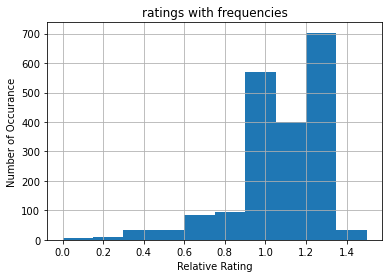

In [561]:
# All ratings will be standarized by dividing all numerators by the corresponding denominator:
rating = master_dataset['rating_numerator']/master_dataset['rating_denominator']
rating.hist(range= (0,1.5))
plt.xlabel('Relative Rating')
plt.ylabel('Number of Occurance')
plt.title('ratings with frequencies')


# what is the distribution of dog categories throughout the pictures?
## what is the category that has the highest number of likes & retweets ?

Text(0, 0.5, 'Occurance')

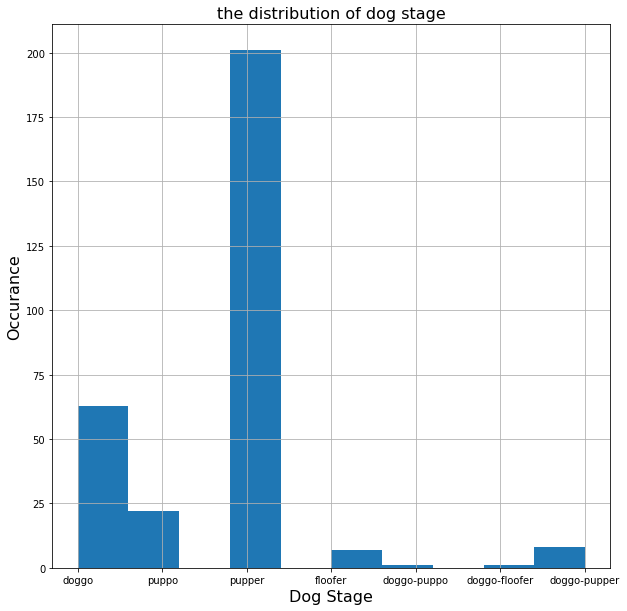

In [552]:
master_dataset.dog_stage.hist(figsize=(10,10))
plt.title('the distribution of dog stage',fontsize = 16)
plt.xlabel('Dog Stage',fontsize = 16)
plt.ylabel('Occurance',fontsize = 16)

Text(0.5, 1.0, 'Average retweets counts for each stage')

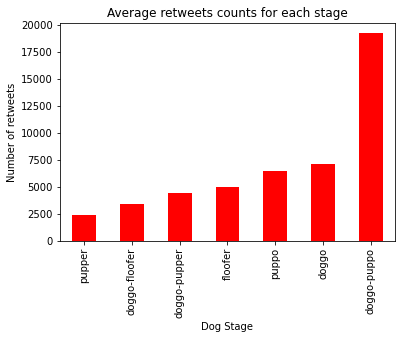

In [567]:
v1=master_dataset.groupby(['dog_stage']).retweet_count.mean().sort_values(ascending=False)[12::-1]
v1.plot(kind='bar',color= 'red')
plt.xlabel('Dog Stage')
plt.ylabel('Number of retweets')
plt.title('Average retweets counts for each stage')


Text(0.5, 1.0, 'Average likes counts for each stage')

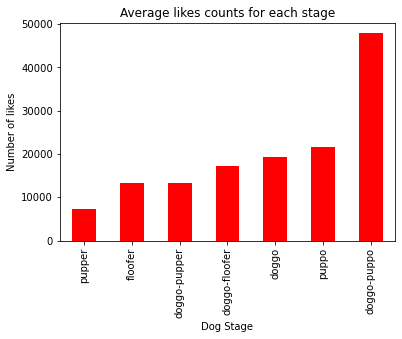

In [568]:
v2=master_dataset.groupby(['dog_stage']).favorite_count.mean().sort_values(ascending=False)[12::-1]
v2.plot(kind='bar',color= 'red')
plt.xlabel('Dog Stage')
plt.ylabel('Number of likes')
plt.title('Average likes counts for each stage')

# what is the most accurate predictions from the three predictions ?  

Text(0.5, 1.0, 'FIrst Image Prediction accuracy')

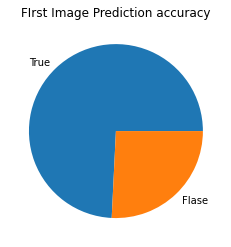

In [553]:
# the figure below shows the precition of first image prediction.

plt.pie(master_dataset.breed_1.value_counts(),labels=['True','Flase']);
plt.title('FIrst Image Prediction accuracy')



Text(0.5, 1.0, 'Second Image Prediction accuracy')

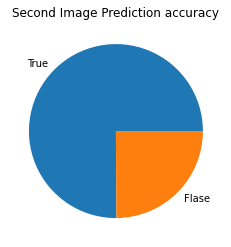

In [554]:
plt.pie(master_dataset.breed_2.value_counts(),labels=['True','Flase']);
plt.title('Second Image Prediction accuracy')

Text(0.5, 1.0, 'Third Image Prediction accuracy')

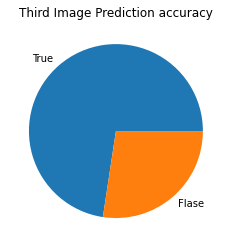

In [555]:
plt.pie(master_dataset.breed_3.value_counts(),labels=['True','Flase']);
plt.title('Third Image Prediction accuracy')

# the confidence of three predictions.

Text(0.5, 1.0, 'The confidence of Image Prediction 1')

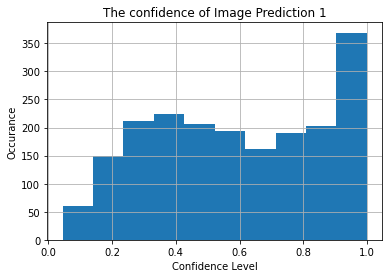

In [556]:
master_dataset.confidence_1.hist()
plt.xlabel('Confidence Level')
plt.ylabel('Occurance')
plt.title('The confidence of Image Prediction 1')

Text(0.5, 1.0, 'The confidence of Image Prediction 2')

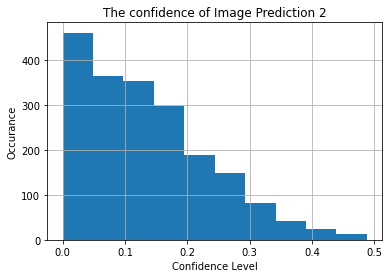

In [557]:
master_dataset.confidence_2.hist()
plt.xlabel('Confidence Level')
plt.ylabel('Occurance')
plt.title('The confidence of Image Prediction 2')

Text(0.5, 1.0, 'The confidence of Image Prediction 3')

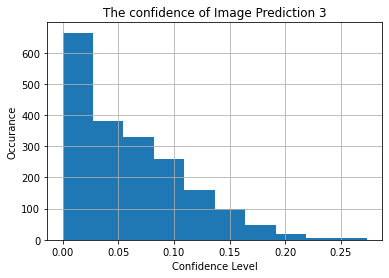

In [558]:
master_dataset.confidence_3.hist()
plt.xlabel('Confidence Level')
plt.ylabel('Occurance')
plt.title('The confidence of Image Prediction 3')

## which dog breed got the highest rate of confidence in the first phase of prediction ?

Text(0.5, 1.0, 'The confidence of each Dog breed')

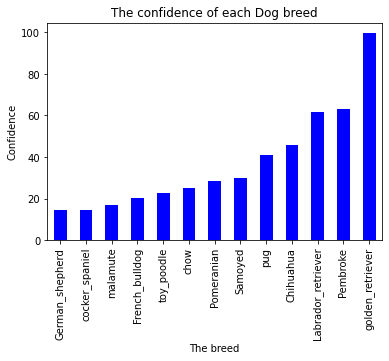

In [559]:
v3=master_dataset.groupby(['prediction_1']).confidence_1.sum().sort_values(ascending=False)[12::-1]
v3.plot(kind='bar',color='blue')
plt.xlabel('The breed')
plt.ylabel('Confidence')
plt.title('The confidence of each Dog breed')

## Does the number of retweets have an impact on the number of likes for each picture ?

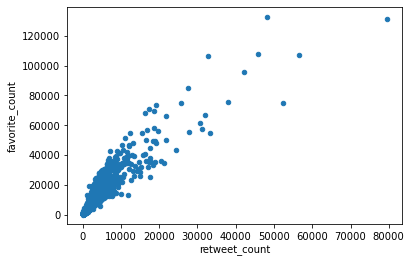

In [560]:
master_dataset.plot(x='retweet_count',y='favorite_count',kind='scatter');